# Research Paper Recommendation

Research papers hold significant importance as they contribute to the advancement of knowledge by presenting new findings and insights. They undergo rigorous peer review to ensure credibility and validity. These papers serve as a foundation for future studies, allowing researchers to build upon existing work and identify research gaps. They enable the dissemination of information, foster collaboration and networking, and serve as references for critical analysis within the scientific community. Research papers play a vital role in academic and professional growth, enhancing visibility and reputation. They lead to innovations, have practical applications, and provide evidence-based information for policy-making and decision-making processes. Through replication and verification, they ensure the reliability of research, and they have the potential to make a global impact by addressing societal challenges and advancing human knowledge.

A literature review is a critical and comprehensive analysis of existing research papers on a specific topic. It involves systematically reviewing, summarizing, and evaluating the relevant research studies, articles, books, and other sources to provide a comprehensive overview of the current state of knowledge in a particular field. The purpose of a literature review is to identify the gaps, trends, and patterns in the existing literature, highlight the theoretical frameworks and methodologies employed, and synthesize the findings to develop a solid theoretical foundation for further research. It serves as a crucial component of research papers, guiding researchers in formulating research questions, identifying research gaps, and contributing to the existing body of knowledge.

Finding papers for a literature review can be challenging due to the vast amount of available literature, limited access to scholarly resources, language barriers, publication bias, time constraints, and the need to stay up-to-date with the latest research. However, by narrowing down the search, utilizing available resources, exploring diverse sources, managing time effectively, staying informed, and seeking expert guidance, these difficulties can be overcome, enabling a comprehensive and well-informed literature review.

## Embeddings

Embeddings are numerical representations of data that capture meaningful relationships and similarities between items. In the context of natural language processing (NLP), embeddings such as word embeddings and sentence embeddings encode words or sentences into dense vectors in a continuous vector space. These vectors are learned through unsupervised methods, considering co-occurrence patterns or utilizing sophisticated models like the Universal Sentence Encoder (USE), BERT, or GPT. Embeddings enable algorithms to understand the contextual meaning and relationships within words and sentences. They facilitate efficient comparisons, measuring similarities using metrics like cosine similarity, and exhibit vector arithmetic, capturing semantic relationships. By representing textual data numerically, embeddings enhance the performance of machine learning models in various NLP tasks, allowing for more effective analysis, retrieval, and understanding of textual information.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ytRLNPOlDQ7kV6XhwH4baA.png">

## Semantic Similarity

Semantic similarity refers to the degree of similarity or relatedness between two pieces of text based on their underlying meaning. It goes beyond surface-level similarities and focuses on capturing the contextual and semantic relationships between words, phrases, or sentences. Semantic similarity can be assessed using various techniques, including natural language processing (NLP) models and similarity metrics such as cosine similarity or Euclidean distance. These methods aim to measure the similarity between textual representations, such as word embeddings or sentence embeddings, by considering the semantic relationships encoded within them. Semantic similarity has applications in several NLP tasks, including information retrieval, question answering, text summarization, and machine translation, where understanding the semantic similarity between text snippets is crucial for accurate and meaningful analysis.

<img src="https://www.researchgate.net/publication/266477879/figure/fig3/AS:669279997399053@1536580194278/Example-of-semantic-similarity-calculation.png">


<div class="alert alert-success" role="alert">
    <h3>In this Project</h3>
    <ul>
        <li>Extracting Research Papers data from Arxiv dataset</li>
        <li>Using <strong>Universal Sentence Encoder</strong> to extract embeddings of Research Abstracts</li>
        <li>Training a K Neighbors Classifier to find similar research papers</li>
    </ul>
</div>

# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.losses import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['font.size'] = 14

# Loading Data

In [2]:
FILE = '/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'

def get_data():
    with open(FILE) as f:
        for line in f:
            yield line

In [3]:
dataframe = {
    'title': [],
    'year': [],
    'abstract': []
}

data = get_data()
for i, paper in enumerate(data):
    paper = json.loads(paper)
    try:
        date = int(paper['update_date'].split('-')[0])
        if date > 2019:
            dataframe['title'].append(paper['title'])
            dataframe['year'].append(date)
            dataframe['abstract'].append(paper['abstract'])
    except: pass

In [4]:
df = pd.DataFrame(dataframe)
df.head(10)

,title,year,abstract
0,Convergence of the discrete dipole approximati...,2022,We performed a rigorous theoretical converge...
1,The discrete dipole approximation: an overview...,2022,We present a review of the discrete dipole a...
2,Mapping radii of metric spaces,2021,It is known that every closed curve of lengt...
3,What can emission lines tell us?,2023,1 Generalities\n 2 Empirical diagnostics ba...
4,The affine part of the Picard scheme,2021,We describe the maximal torus and maximal un...
5,The Veldkamp Space of Two-Qubits,2024,Given a remarkable representation of the gen...
6,Manifolds admitting a $\tilde G_2$-structure,2023,We find a necessary and sufficient condition...
7,Actions for the Bosonic String with the Curved...,2020,At first we introduce an action for the stri...
8,Stochastic action principle and maximum entropy,2020,A stochastic action principle for stochastic...
9,Axiom A polynomial skew products of C^2 and th...,2023,A polynomial skew product of C^2 is a map of...


In [5]:
del dataframe

### Shape of Data

In [6]:
print(f"Samples: {df.shape[0]}\nFeatures: {df.shape[1]}")

Samples: 996237
Features: 3


### Missing Values

In [7]:
any(df.isna().sum())

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996237 entries, 0 to 996236
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     996237 non-null  object
 1   year      996237 non-null  int64 
 2   abstract  996237 non-null  object
dtypes: int64(1), object(2)
memory usage: 22.8+ MB


# Exploratory Data Analysis

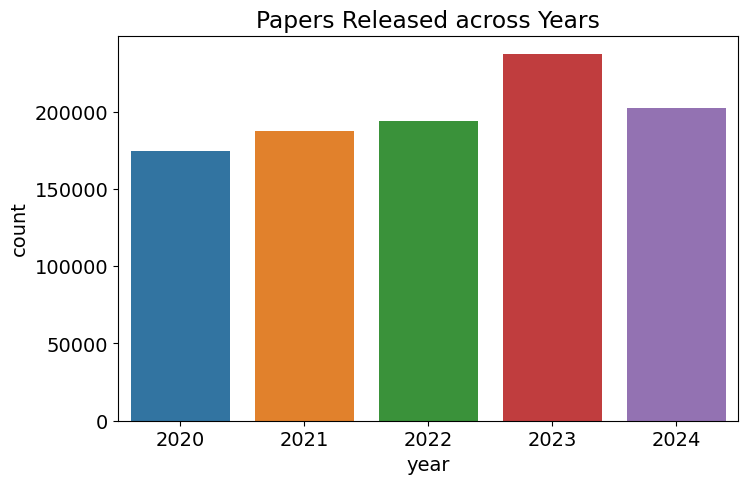

In [9]:
sns.countplot(data=df, x='year')
plt.title("Papers Released across Years")
plt.show()

### Abstract Length

In [10]:
df['length'] = df['abstract'].str.len()
df.head(10)

,title,year,abstract,length
0,Convergence of the discrete dipole approximati...,2022,We performed a rigorous theoretical converge...,832
1,The discrete dipole approximation: an overview...,2022,We present a review of the discrete dipole a...,617
2,Mapping radii of metric spaces,2021,It is known that every closed curve of lengt...,737
3,What can emission lines tell us?,2023,1 Generalities\n 2 Empirical diagnostics ba...,181
4,The affine part of the Picard scheme,2021,We describe the maximal torus and maximal un...,126
5,The Veldkamp Space of Two-Qubits,2024,Given a remarkable representation of the gen...,582
6,Manifolds admitting a $\tilde G_2$-structure,2023,We find a necessary and sufficient condition...,220
7,Actions for the Bosonic String with the Curved...,2020,At first we introduce an action for the stri...,414
8,Stochastic action principle and maximum entropy,2020,A stochastic action principle for stochastic...,770
9,Axiom A polynomial skew products of C^2 and th...,2023,A polynomial skew product of C^2 is a map of...,784


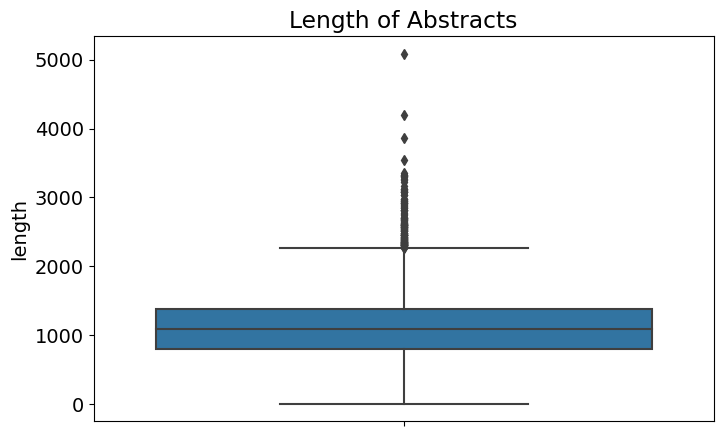

In [11]:
sns.boxplot(data=df, y='length')
plt.title("Length of Abstracts")
plt.show()

### Word Count

In [12]:
def word_count(x):
    return len(x.split())

df['word_count'] = df['abstract'].apply(word_count)
df.head()

,title,year,abstract,length,word_count
0,Convergence of the discrete dipole approximati...,2022,We performed a rigorous theoretical converge...,832,133
1,The discrete dipole approximation: an overview...,2022,We present a review of the discrete dipole a...,617,96
2,Mapping radii of metric spaces,2021,It is known that every closed curve of lengt...,737,138
3,What can emission lines tell us?,2023,1 Generalities\n 2 Empirical diagnostics ba...,181,27
4,The affine part of the Picard scheme,2021,We describe the maximal torus and maximal un...,126,21


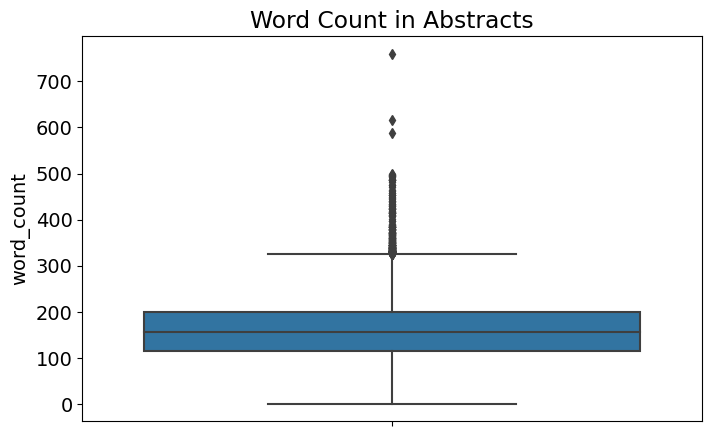

In [13]:
sns.boxplot(data=df, y='word_count')
plt.title("Word Count in Abstracts")
plt.show()

In [14]:
print(f"Mean of Word Count: {df['word_count'].mean():.2f}\nMedian of Word Count: {df['word_count'].median()}")

Mean of Word Count: 157.61
Median of Word Count: 156.0


# Universal Sentence Encoder 

The Universal Sentence Encoder (USE) is a pre-trained deep learning model in the field of natural language processing (NLP) that encodes sentences or text snippets into fixed-length numerical representations. It leverages a combination of recurrent and transformer neural networks to capture both the meaning and context of sentences. The USE is trained on a large corpus of text and can generate high-quality sentence embeddings that capture semantic information and similarities between sentences. These embeddings enable efficient computation of semantic similarity or relatedness between different sentences, facilitating tasks such as text classification, sentiment analysis, information retrieval, and text generation. The Universal Sentence Encoder has gained popularity due to its ability to provide versatile and effective representations of sentences, making it a valuable tool for a wide range of NLP applications.



<img src="https://amitness.com/images/use-overall-pipeline.png">

In [15]:
# Tensorflow Hub URL for Universal Sentence Encoder
MODEL_URL = "https://tfhub.dev/google/universal-sentence-encoder/4"

# KerasLayer
sentence_encoder_layer = hub.KerasLayer(MODEL_URL,
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="use")

abstracts = df["abstract"].to_list()

In [16]:
# Setup for embeddings computation
embeddings = []
batch_size = 3000
num_batches = len(abstracts) // batch_size

In [17]:
# Compute Embeddings in batches
for i in range(num_batches):
    batch_abstracts = abstracts[i*batch_size : (i+1)*batch_size]
    batch_embeddings = sentence_encoder_layer(batch_abstracts)
    embeddings.extend(batch_embeddings.numpy())

# Embeddings for remaining abstracts
remaining_abstracts = abstracts[num_batches*batch_size:]
if len(remaining_abstracts) > 0:
    remaining_embeddings = sentence_encoder_layer(remaining_abstracts)
    embeddings.extend(remaining_embeddings.numpy())
    
embeddings = np.array(embeddings)
y = df.index

## KNN Classifier

In [18]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(embeddings,y)

KNeighborsClassifier(n_neighbors=6)

# Visualize Results

In [19]:
for _ in range(5):
    idx = random.randint(i, len(y))
    sample = df["title"][idx]
    dist, index = nn.kneighbors(X=embeddings[idx,:].reshape(1,-1))
    print(f"Sample:\n{sample}\n")
    for i in range(1,6):
        print(f"Recommendation {i}:\n{df['title'][index[0][i]]}\n")
    print("===============\n")

Sample:
Time Window of Head Impact Kinematics Measurement for Calculation of
  Brain Strain and Strain Rate in American Football

Recommendation 1:
Deep Learning Head Model for Real-time Estimation of Entire Brain
  Deformation in Concussion

Recommendation 2:
Data-driven decomposition of brain dynamics with principal component
  analysis in different types of head impacts

Recommendation 3:
Low-rank representation of head impact kinematics: A data-driven
  emulator

Recommendation 4:
A comparison of sports-related head accelerations with and without
  direct head impacts

Recommendation 5:
Denoising instrumented mouthguard measurements of head impact kinematics
  with a convolutional neural network


Sample:
From Requirements to Autonomous Flight: An Overview of the Monitoring
  ICAROUS Project

Recommendation 1:
Monitoring ROS2: from Requirements to Autonomous Robots

Recommendation 2:
Automated Formation Control Synthesis from Temporal Logic Specifications

Recommendation 3:
SkiNet,

<div class="alert alert-success" role="alert">
    <h1>Conclusion</h1>
    <p>In conclusion, the Universal Sentence Encoder (USE) offers a powerful tool for finding similar research papers based on their abstracts. By encoding research abstracts into fixed-length numerical representations, the USE captures the semantic meaning and contextual information of the texts. This enables the computation of semantic similarity between abstracts, facilitating the identification of related research papers. The USE's ability to capture nuanced semantic relationships and its robustness in handling different language patterns make it particularly valuable for this task. By leveraging the USE, researchers can efficiently discover relevant papers, uncover hidden connections, and gain deeper insights into the existing body of knowledge. This facilitates literature review processes, aids in identifying research gaps, and promotes further advancements in various fields of study, overall, performing as powerful research tool.</p>
</div>